In [28]:
def poisson_process(dt,alpha):
    p = np.random.random()
    if p>alpha*dt:
        c = 0.
    else: 
        c = 1.
    return c
def gaussian_process(dt,sigma):
    c = np.random.normal(0,sigma*dt)
    return c
def Naive_predetor_Prey(N,J,M,dt,mu,lam,ni,f = 50,k=0.0001):
 for j in range(1,N):
    P1 = lam*M[j-1]*dt
    P2 = mu*J[j-1]*M[j-1]*dt
    P3 = ni*J[j-1]*dt
    #P4 = P1 / 6

    a1 = rand()
    a2 = rand()
    a3 = rand()
    a4 = rand()
    
    if P1>a1:
        dN1 = 1
    else:
        dN1 = 0
    if P2>a2:
        dN2 = 1
    else:
        dN2 = 0
    if P3>a3:
        dN3 = 1
    else:
        dN3 = 0
    #if P4>a4:
      #  dN4 = 1
    #else:
      #  dN4 = 0

    dM = dN1 - dN2 #- dN4
    dJ = dN2 - dN3 

    J[j] = J[j-1]+dJ
    M[j] = M[j-1]+dM
    #lam = lam + f*dt - k*M[j]
 return(J,M)
 
def Black_Scholes(S,E,r,sigma,dT,type):
    d1 = (np.log(S/E)+(r+0.5*sigma**2)*dT)/(sigma*np.sqrt(dT))
    d2 = d1 - sigma*np.sqrt(dT)
    if type == 'call':
        C = S*stats.norm.cdf(d1) - E*np.exp(-r*dT)*stats.norm.cdf(d2)
    elif type == 'put':
        C = E*np.exp(-r*dT)*stats.norm.cdf(-d2) - S*stats.norm.cdf(-d1)
    return C

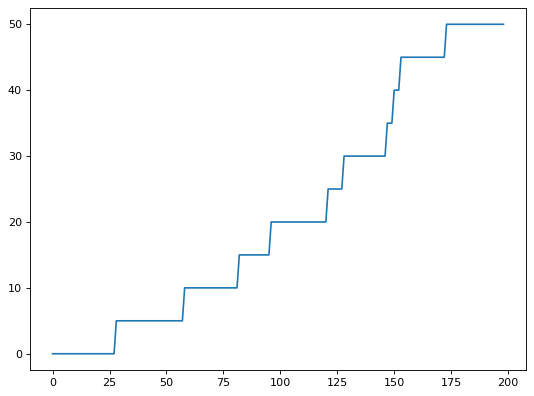

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy.random import rand
import scipy.stats as stats
figure(figsize=(8,6),dpi = 80)
alpha = 6
sigma = 0.
dt = 0.01
N = 200
f = 0
T = N*dt
zen = np.zeros(N-1)
Poisson = np.zeros(N+1)
Gaussian = np.zeros(N+1)
for i in range(N-1):
    Poisson[i+1] =  Poisson[i] + poisson_process(dt,alpha)
    Gaussian[i+1] = Gaussian[i] + gaussian_process(dt,sigma)
    zen[i] = Poisson[i+1] + Gaussian[i+1]
    f = f + zen[i]
plt.plot(zen)

In [3]:
N = 90000
J,M = np.zeros(N),np.zeros(N)
J[0],M[0] = 100,200
dt = 0.0001
mu = 0.1
lam = 10
ni = 10

Jaguars, Mice = np.zeros(N),np.zeros(N)
time = dt*np.arange(N)
J,M = Naive_predetor_Prey(N,J,M,dt,mu,lam,ni)

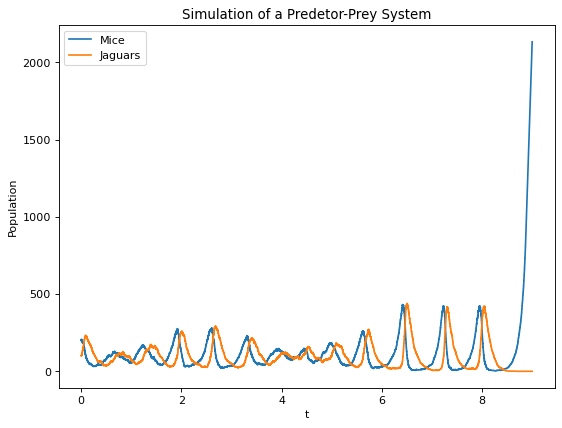

In [4]:
figure(figsize=(8,6),dpi = 80)

plt.plot(time,M,label = "Mice")
plt.plot(time,J,label = "Jaguars")

plt.ylabel("Population")
plt.xlabel("t")
plt.legend()
plt.title("Simulation of a Predetor-Prey System")
plt.show()

C:\Users\hgton\AppData\Local\Temp/ipykernel_15480/892602638.py:49: RuntimeWarning: invalid value encountered in true_divide
  d1 = (np.log(S/E)+(r+0.5*sigma**2)*dT)/(sigma*np.sqrt(dT))
C:\Users\hgton\AppData\Local\Temp/ipykernel_15480/892602638.py:49: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(S/E)+(r+0.5*sigma**2)*dT)/(sigma*np.sqrt(dT))


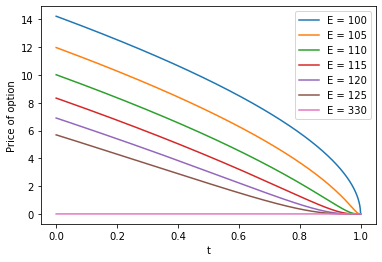

In [5]:
r = 0.05
S = 100
sigma = 0.3
E = 100
T = 1
t = np.arange(T,0,-dt)
C = Black_Scholes(S,E,r,sigma,T-t,'call')
C1 = Black_Scholes(S,E+5,r,sigma,T-t,'call')
C2 = Black_Scholes(S,E+10,r,sigma,T-t,'call')
C3 = Black_Scholes(S,E+15,r,sigma,T-t,'call')
C4 = Black_Scholes(S,E+20,r,sigma,T-t,'call')
C5 = Black_Scholes(S,E+25,r,sigma,T-t,'call')
C6 = Black_Scholes(S,E+230,r,sigma,T-t,'call')

plt.plot(t,C,label ="E = 100")
plt.plot(t,C1,label ="E = 105")
plt.plot(t,C2,label ="E = 110")
plt.plot(t,C3,label ="E = 115")
plt.plot(t,C4,label ="E = 120")
plt.plot(t,C5,label ="E = 125")
plt.plot(t,C6,label ="E = 330")
plt.legend()
plt.xlabel("t")
plt.ylabel("Price of option")
plt.show()

In [ ]:
def Reaction_diffusion_system()